# Psyschometrics for Rapid Emotion Comprehension

### Description
In this tutorial we will be going through the _data science pipeline_. The steps in the data science pipeline are the main stages you will go through when conduting a data science project. 
The stages are:
1. Data Collection
2. Data Management 
3. Exploratory Data Analysis
4. Hypothesis Testing
5. Communication of Results

Although the stages a presented sequentially, as we will see, we only loosely follow the sequence. We often go back and forth between them. In this tutorial we will go through the data science pipeline to try to answer the following question:

_What psychological factors predict emotional intelligence?_


### Background

Because this investigation will rely on some terms from psychology, the following will serve as a reference of potentially unfamiliar concepts.
- _Emotional Intelligence_ (EI): The ability to 1) "recognize, understand, and manage our own emotions" and 2) "recognize, understand and influence the emotions of others."<sup> (1) </sup>
- _Neuroticism_: One of the Big 5 personality traits associated with one's "tendency to experience negative emotions and psychological distress in response to stressors." <sup> (2) </sup> Greater neuroticism means more distress.
- _Extraversion_: One of the Big 5 personality traits associated with one's degree of sociability, positive emotionality, and general activity." <sup> (2) </sup> Greater extraversion means more sociability, positive emotionality, and activity.
- _Openness_:  One of the Big 5 personality traits associated with one's "levels of curiosity, independent judgment, and conservativeness." <sup> (2) </sup> Greater openness means more curiosity, independent judgements, and less conservativeness.
- Agreeablness: One of the Big 5 personality traits associated with one's "altruistic, sympathetic, and cooperative tendencies" <sup> (2) </sup>. Greater agreeablness means greater altruism, sympathy, and cooperative tendencies.
- _Conscientiousness_: One of the Big 5 personality traits associated with one’s "level of self-control in planning and organization." <sup> (2) </sup> Greater Conscientiousness means more self-control and organization.
- Raven's IQ: A score associated with the Raven's Matrices test that measures "an individual’s intelligence and abstract reasoning." <sup> (3) </sup> Higher scores mean higher intelligence.

### Data Collection
The first step of any data science project is, naturally, to collect the data. There are many ways to collect data. In the scientific literature you will often see researchers run experiments to collect data by probing the universe or human subjects. In computer science we often collect data by scraping it from the web, synthetically generating it, or by accessing an open source database with already curated data. For our purposes we will use data from an open source database called OpenNeuro (see https://openneuro.org/). OpenNeuro contains lots of datasets on neural data collected using techniques like MRI, PET, and EEG scans. Specifically, we will be using data from the Amsterdam Open MRI Collection (AOMIC) descibed in detail here: https://www.nature.com/articles/s41597-021-00870-6)



#### Description of Our Data
The AOMIC has a lot of data. We only need a small subset of it. We will completely ignore the MRI data and only use the psychological level data because neural computation is beyond the scope of this introductory tutorial. Below is a description of the psychological level data we will be using. 

We are restricting ourselves to the Population Imaging of Psychology 1 (PIOP1) dataset which contained a total of 216 subjects. <sup> (4) </sup>  All the subjects are university students.

We will be using participants' demographic and psychological assessment data which includes their age, sex, BMI, handedness, pure or applied area of studies, religiosity, raven's IQ score, and their score on each of the Big 5 Personality traits. 

We will also be using data from the _emotion matching task_.
 
#### Emotion Matching Task
The emotion matching task is how we will operationally measure emotional intelligence. Below is a description, from the studies' paper, of the emotion matching task.

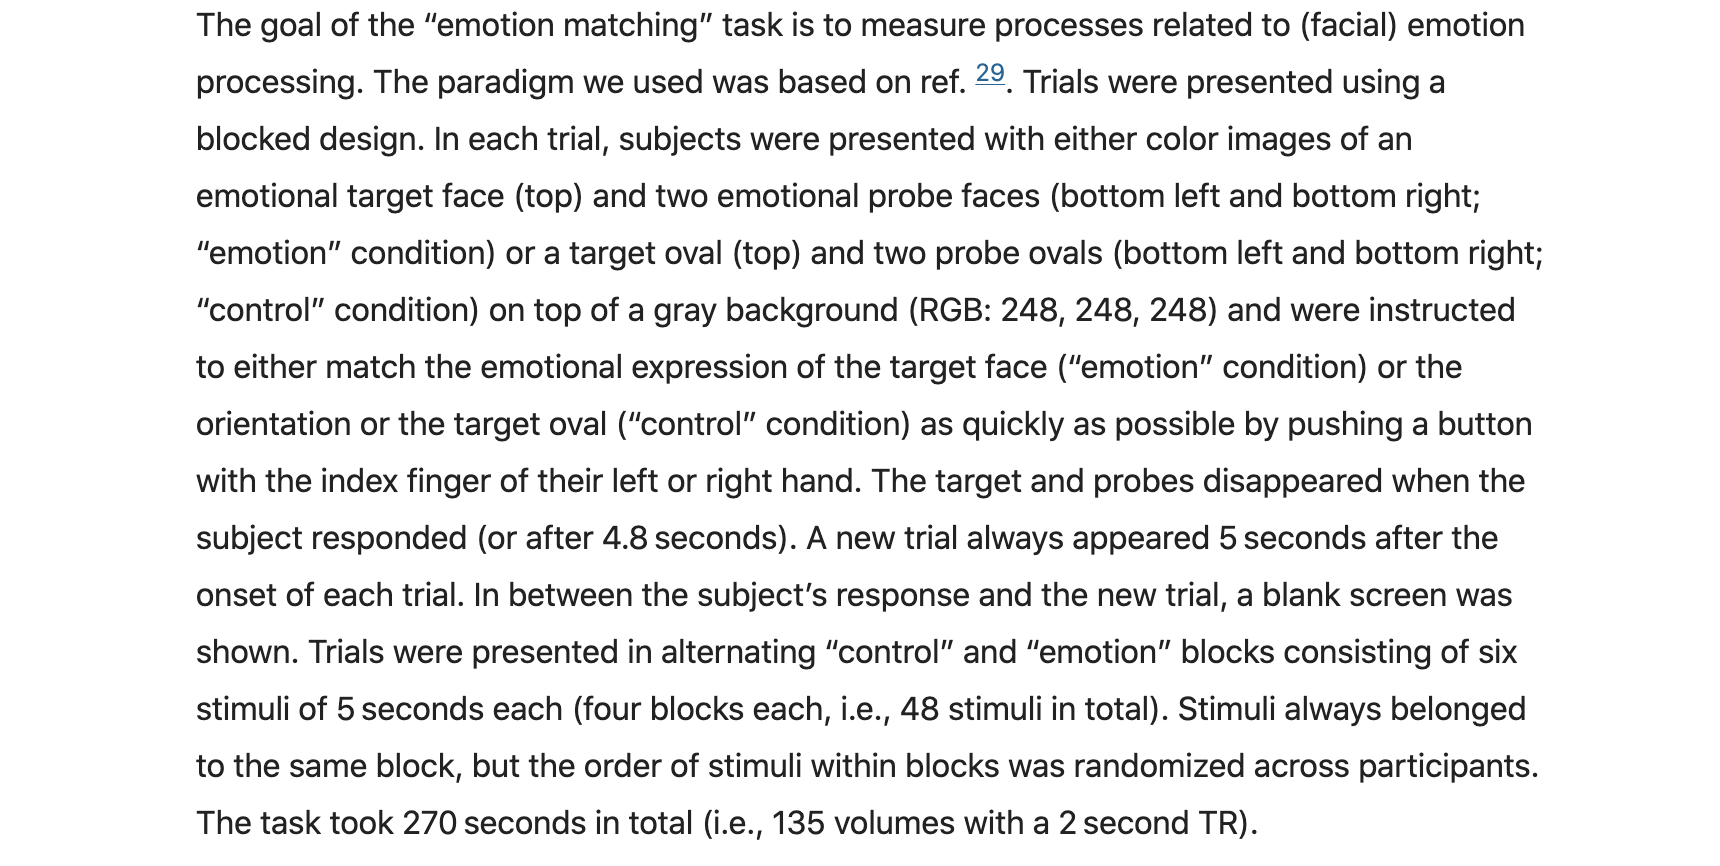


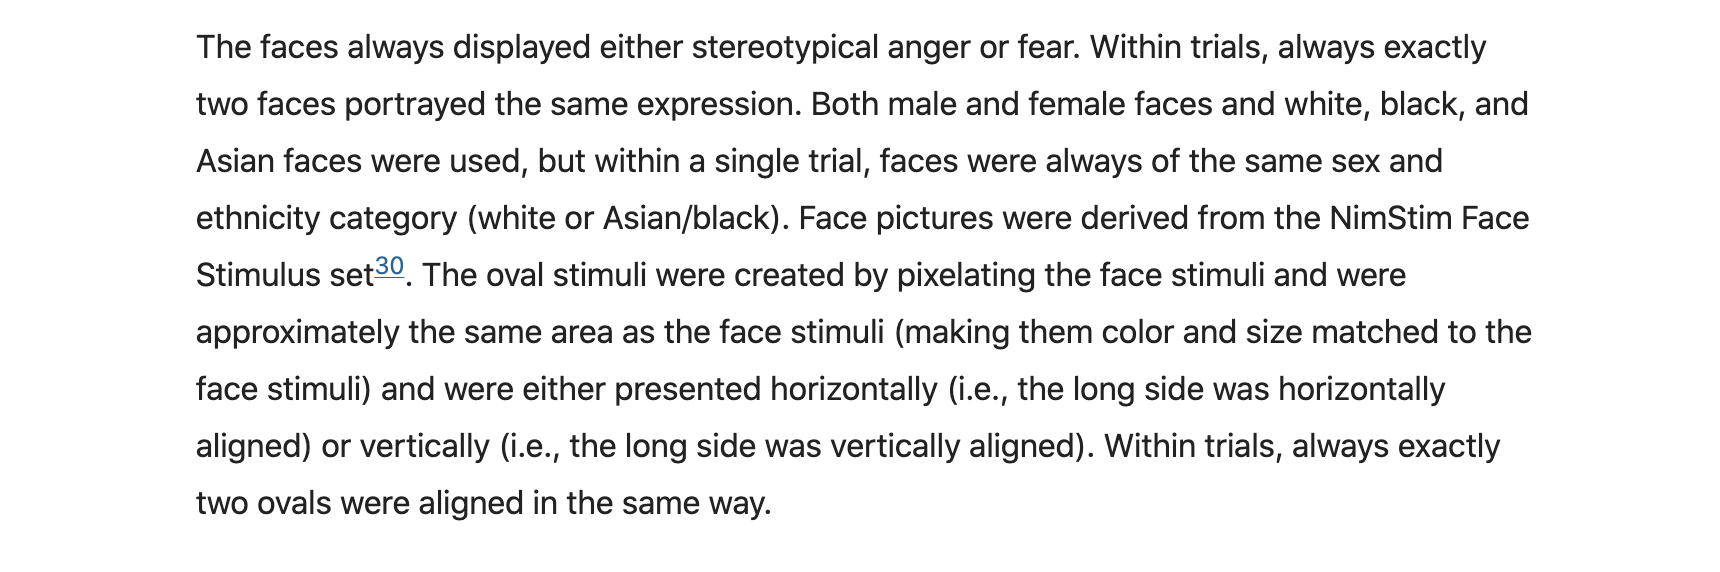

Because the emotion matching task consists of trying to quickly correctly match emotion expressions it can serve as a way to measure emotional recognition (one aspect of EI). We can operationalize the concept of emotional comprehension as a proxy for EI in two ways. One is through calculating the proprotion of correctly classified emotions in the task. The other is to calculate the relative rapidity at which a subject correctly matched emotions. These will be our primary metrics for emotional comprehension in this tutorial.

#### Reading in the Data

The following code will get the relevant AOMIC-PIOP1 data from OpenNeuro.

In [1]:
# It is common practice to shorten 'pandas' to 'pd' for 
# less typing when calling functions from the pandas library.
import pandas as pd
import numpy as np

# In this part, we read in the data. The data is in several different files
# which we would like to eventually combine into one dataframe. 
df_participants = pd.read_csv("https://openneuro.org/crn/datasets/ds002785/snapshots/2.0.0/files/participants.tsv",sep='\t')

df_trials = pd.DataFrame()
# Iterates through subject numbers. Each subject has a dataframe
# of all the trials they participated in. This loop
# combines all those dataframes into one.
for i in range(1, len(df_participants)+1):
    df_subj_trial = pd.read_csv("https://openneuro.org/crn/datasets/ds002785/snapshots/2.0.0/files/sub-"+ 
                             str(i).zfill(4) +":func:sub-"+ str(i).zfill(4) +"_task-emomatching_acq-seq_events.tsv",sep='\t')
   
    # Some participants in the PIOP1 data set never did the emotion matching task 
    # so there is no csv at the link above. In this case the length of the dataframe 
    # is 0 so we do not add it to our aggregate trial data frame. 
    if (len(df_subj_trial) != 0):
        
        # Appends a column to the specific subject's data frame indicating what subject number they 
        # are. This will be useful when all the subjects' data are put together in one
        # dataframe so we can keep track of what data is associated to a given subject.
        df_subj_trial['subject'] = [i]*len(df_subj_trial) 
        
        # Concatenates the new subject's trial dataframe to the aggregate dataframe
        df_trials = pd.concat([df_trials, df_subj_trial])

# Concatenation preserves original indices so we reset them to 
# be seequential.
df_trials = df_trials.reset_index()
df_trials



,index,onset,duration,trial_type,response_time,response_hand,response_accuracy,ori_match,sex,ethn_target,ethn_match,ethn_distractor,emo_match,subject
0,0,10.0115,1.9212,control,1.9212,right,correct,vertical,NaN,NaN,NaN,NaN,NaN,1
1,1,15.0197,1.3478,control,1.3478,left,correct,vertical,NaN,NaN,NaN,NaN,NaN,1
2,2,20.0279,1.2605,control,1.2605,right,correct,horizontal,NaN,NaN,NaN,NaN,NaN,1
3,3,25.0362,0.9700,control,0.9700,left,correct,horizontal,NaN,NaN,NaN,NaN,NaN,1
4,4,30.0444,0.8287,control,0.8287,right,correct,horizontal,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10027,43,225.3638,4.9000,emotion,NaN,NaN,miss,NaN,female,black,asian,asian,fear,215
10028,44,230.3720,2.6348,emotion,2.6348,right,correct,NaN,male,caucasian,caucasian,caucasian,anger,215
10029,45,235.3802,4.9000,emotion,NaN,NaN,miss,NaN,male,black,black,black,fear,215
10030,46,240.3884,4.9000,emotion,NaN,NaN,miss,NaN,female,caucasian,caucasian,caucasian,anger,215


This is a lot of code so let's break it down. If the code takes a little bit of time to run that is ok, concatenating many dataframe can be computationally intensive.

We want to read in the tsv file containing data about our participants and also the tsv files containing data about the emotion matching task trials for each subject. Instead of manually downloading each file by hand we can inspect the html of the download buttons on OpenNeuro to get the actual tsv link. Here is what the process looks like for finding the participants tsv file link.

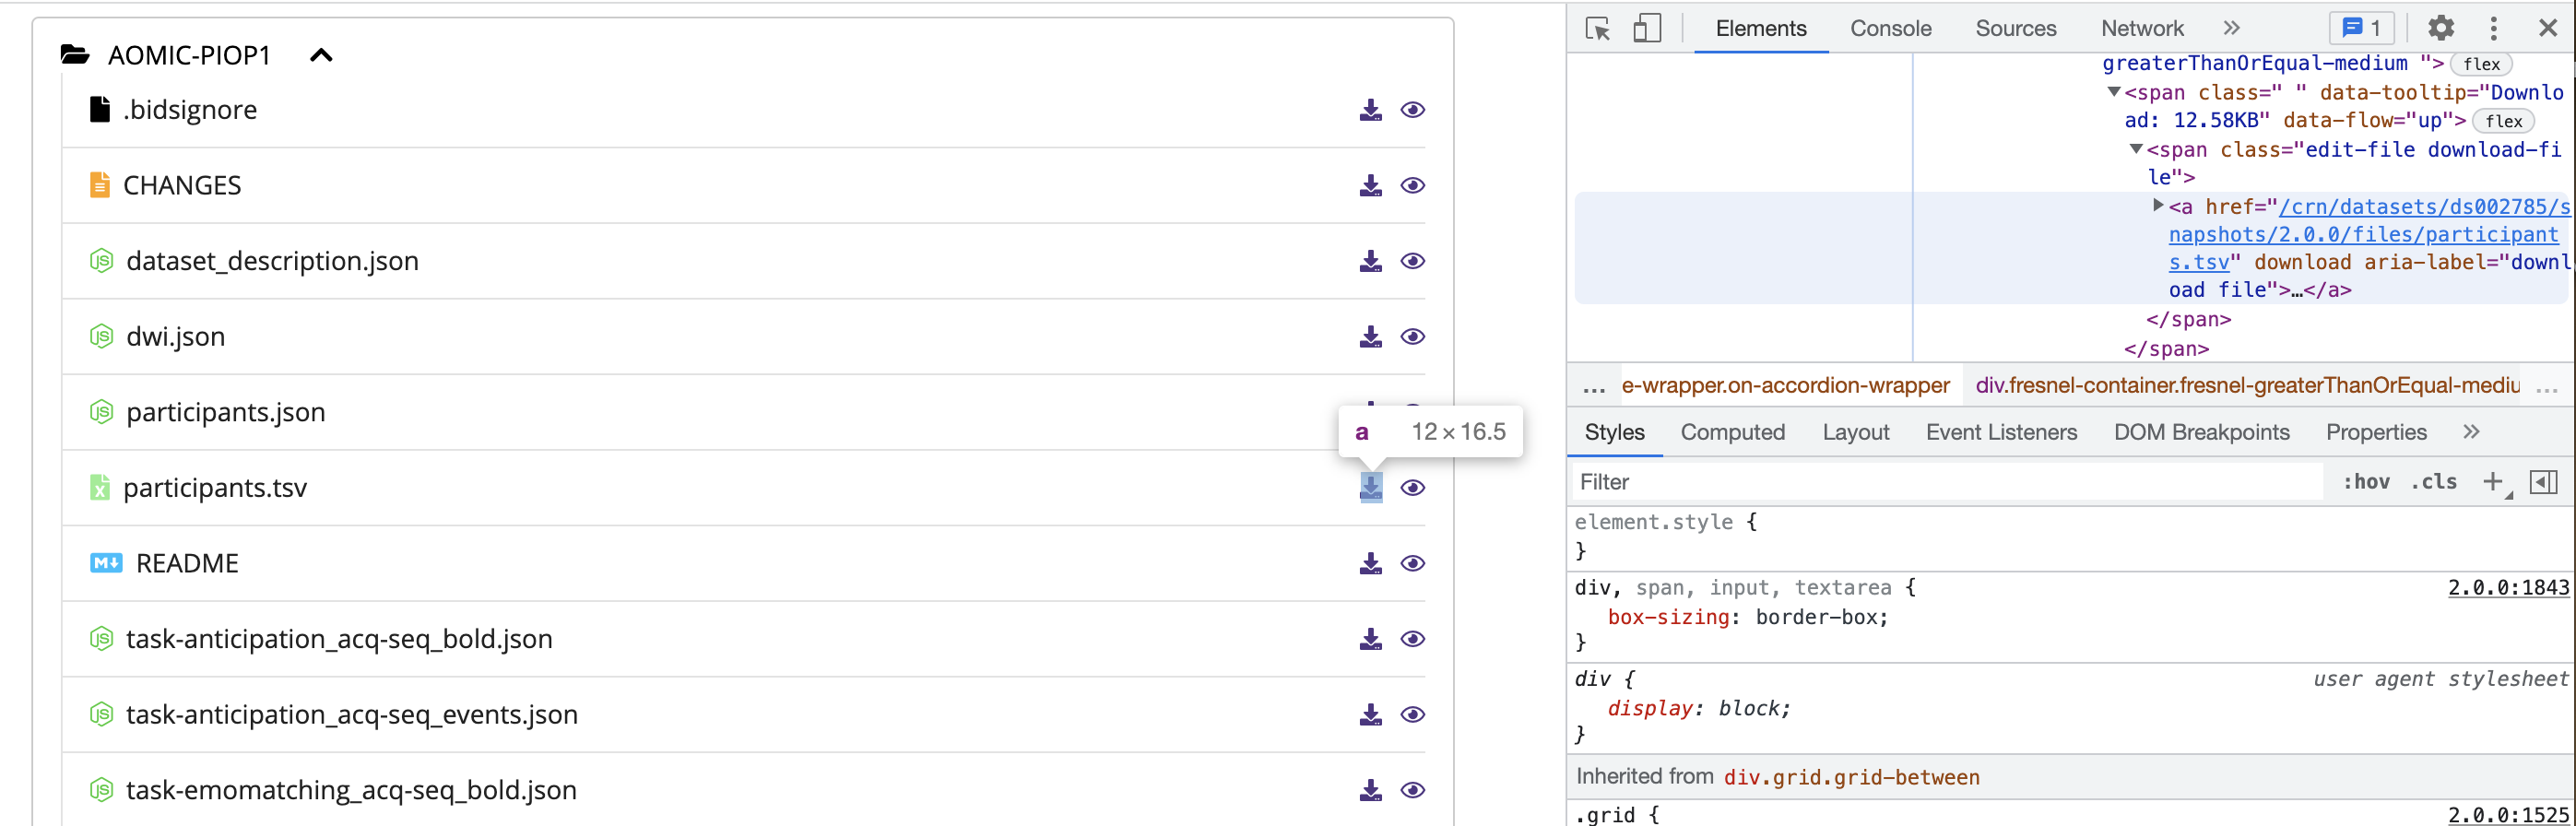

Once we have the link we can use pandas read_csv function to convert the tsv file into a pandas dataframe. We chose to store our data in a dataframe because a dataframe is a useful representation of tabular data (the sort we have). A dataframe would not have been a good choice if we wanted to store graph data like for a social network. 

It was simple to read in the participants tsv file since there was only one file with all the data. Reading in the emotion matching task trial data for each subject required more work because there was a different file for each subject. To accomplish it we exploited the fact that there was a regularity in the tsv links for each subject's emotion matching tsv file. All the links followed the format but with different subject number so we simply iterated through the subject numbers and concatenated the trial data to an aggregate dataframe. We did not want to lose track of which trials were done by which subject so, before concatenating a subject's data to the aggregate dataframe, we marked all of the subject's trials with the subjects number. 

#### Additional Notes
For our data reading purposes we only needed the pandas library. Other common libraries used for data collection are BeautifulSoup and requests. You can use requests to access an API and both of them if your data comes from webscraping. 

- See here for documentation about the requests library: https://docs.python-requests.org/en/latest/
- See here for documentation about the BeautifulSoup: https://beautiful-soup-4.readthedocs.io/en/latest/

Although we will not cover webscraping in this tutorial, if it is something you need for your project, I recommend this concise introduction: https://www.dataquest.io/blog/web-scraping-python-using-beautiful-soup/

### Data Management 

Now that our data has been read into python we must process it into the optimal form for computational analysis. This involves three main procedures: organizing data, identifying invalid data, and handling missing data.

#### Data Organization
First we will organize our data by putting both the participant data and aggregate subject trials into one big dataframe. It is convenient to have all the data in one dataframe because then we know what data is associated with one another encoded in our data representation. 

Not all subjects did the emotion matching task so we first want to remove those subjects from the participants dataframe.

In [2]:
df_subjs = df_participants

# Drops participant if they did not do emotion matching task
for i in range(0, len(df_participants)):
    # If participant did not do emotion matching task they
    # won't have a corresponding sub-dataframe of trials.
    if len(df_trials[df_trials['subject']==i+1]) == 0:
        df_subjs = df_subjs.drop(i, axis='index')
        
df_subjs

,participant_id,age,sex,BMI,handedness,education_category,religious_now,raven_score,NEO_N,NEO_E,NEO_O,NEO_A,NEO_C
0,sub-0001,26.25,F,24.0,right,applied,no,29.0,35,44,37,39,48
1,sub-0002,21.00,F,23.0,right,academic,no,27.0,27,53,40,48,34
2,sub-0003,23.00,M,22.0,right,academic,no,22.0,35,40,43,37,38
3,sub-0004,23.50,F,22.0,right,applied,no,21.0,29,47,41,48,41
4,sub-0005,21.75,M,19.0,ambidextrous,applied,no,28.0,26,35,40,38,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,sub-0211,22.50,M,20.0,right,academic,no,35.0,34,40,52,41,49
211,sub-0212,20.50,F,29.0,ambidextrous,applied,no,19.0,24,44,29,47,41
212,sub-0213,19.75,M,26.0,right,applied,no,18.0,20,50,40,46,39
213,sub-0214,19.50,M,19.0,right,applied,no,19.0,24,50,37,46,56


Since each participant that did the emotion matching task did 48 trials we repeat the information of each participant 48 times so that the length of the participant information dataframe has the same size as our aggregate trial dataframe. 

In [3]:
# Repeat values 48 times since 48 trials
subj_merge = pd.DataFrame(np.repeat(df_subjs.values, 48, axis=0))
# Sets columns with proper names
subj_merge.columns = df_subjs.columns
# Repeat function converts all data types to pandas object type
# so we have to manually convert the numeric types back to numeric
subj_merge['raven_score'] = pd.to_numeric(subj_merge['raven_score'])
subj_merge['NEO_N'] = pd.to_numeric(subj_merge['NEO_N'])
subj_merge['NEO_E'] = pd.to_numeric(subj_merge['NEO_E'])
subj_merge['NEO_O'] = pd.to_numeric(subj_merge['NEO_O'])
subj_merge['NEO_A'] = pd.to_numeric(subj_merge['NEO_A'])
subj_merge['NEO_C'] = pd.to_numeric(subj_merge['NEO_C'])
subj_merge

,participant_id,age,sex,BMI,handedness,education_category,religious_now,raven_score,NEO_N,NEO_E,NEO_O,NEO_A,NEO_C
0,sub-0001,26.25,F,24.0,right,applied,no,29.0,35,44,37,39,48
1,sub-0001,26.25,F,24.0,right,applied,no,29.0,35,44,37,39,48
2,sub-0001,26.25,F,24.0,right,applied,no,29.0,35,44,37,39,48
3,sub-0001,26.25,F,24.0,right,applied,no,29.0,35,44,37,39,48
4,sub-0001,26.25,F,24.0,right,applied,no,29.0,35,44,37,39,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10027,sub-0215,18.25,F,20.0,right,applied,yes,24.0,33,42,42,41,48
10028,sub-0215,18.25,F,20.0,right,applied,yes,24.0,33,42,42,41,48
10029,sub-0215,18.25,F,20.0,right,applied,yes,24.0,33,42,42,41,48
10030,sub-0215,18.25,F,20.0,right,applied,yes,24.0,33,42,42,41,48


The subject order in both the expanded participant information dataframe and the aggregate trial data frame is sequential so they will match one-to-one correctly when we merge the dataframes. We use an inner join merge because every index should have a unique match in the other dataframe. If we end up with less than 10032 rows we know there was an issue.

In [4]:
df = df_trials.join(subj_merge, how='inner', lsuffix='_of_face', rsuffix='_of_subject')
df

,index,onset,duration,trial_type,response_time,response_hand,response_accuracy,ori_match,sex_of_face,ethn_target,...,BMI,handedness,education_category,religious_now,raven_score,NEO_N,NEO_E,NEO_O,NEO_A,NEO_C
0,0,10.0115,1.9212,control,1.9212,right,correct,vertical,NaN,NaN,...,24.0,right,applied,no,29.0,35,44,37,39,48
1,1,15.0197,1.3478,control,1.3478,left,correct,vertical,NaN,NaN,...,24.0,right,applied,no,29.0,35,44,37,39,48
2,2,20.0279,1.2605,control,1.2605,right,correct,horizontal,NaN,NaN,...,24.0,right,applied,no,29.0,35,44,37,39,48
3,3,25.0362,0.9700,control,0.9700,left,correct,horizontal,NaN,NaN,...,24.0,right,applied,no,29.0,35,44,37,39,48
4,4,30.0444,0.8287,control,0.8287,right,correct,horizontal,NaN,NaN,...,24.0,right,applied,no,29.0,35,44,37,39,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10027,43,225.3638,4.9000,emotion,NaN,NaN,miss,NaN,female,black,...,20.0,right,applied,yes,24.0,33,42,42,41,48
10028,44,230.3720,2.6348,emotion,2.6348,right,correct,NaN,male,caucasian,...,20.0,right,applied,yes,24.0,33,42,42,41,48
10029,45,235.3802,4.9000,emotion,NaN,NaN,miss,NaN,male,black,...,20.0,right,applied,yes,24.0,33,42,42,41,48
10030,46,240.3884,4.9000,emotion,NaN,NaN,miss,NaN,female,caucasian,...,20.0,right,applied,yes,24.0,33,42,42,41,48


Now all our data is in one dataframe.

#### Identifying Invalid Data

The documentation in OpenNeuro about the emotion matching task specifies what the possible values are for an entry in each column. <sup> (5) </sup> For example, the response hand is either 'right' or 'left'. We can also get this information from the AOMIC paper describing the experimental procedure. <sup> (4) </sup> Although we would hope that the data we downloaded follows its documentation and the paper's description, it is good practice to check that this is the case. As we will see sometimes documentation is not correct! To recall, here are our current columns:

In [5]:
df.columns

Index(['index', 'onset', 'duration', 'trial_type', 'response_time',
       'response_hand', 'response_accuracy', 'ori_match', 'sex_of_face',
       'ethn_target', 'ethn_match', 'ethn_distractor', 'emo_match', 'subject',
       'participant_id', 'age', 'sex_of_subject', 'BMI', 'handedness',
       'education_category', 'religious_now', 'raven_score', 'NEO_N', 'NEO_E',
       'NEO_O', 'NEO_A', 'NEO_C'],
      dtype='object')

By reviewing the AOMIC paper we see something strange. There is no mention of an ethn_distractor or ethn_match variable. The picture below shows the 10 variables that we would expect to be included based upon the AOMIC paper, published in nature.

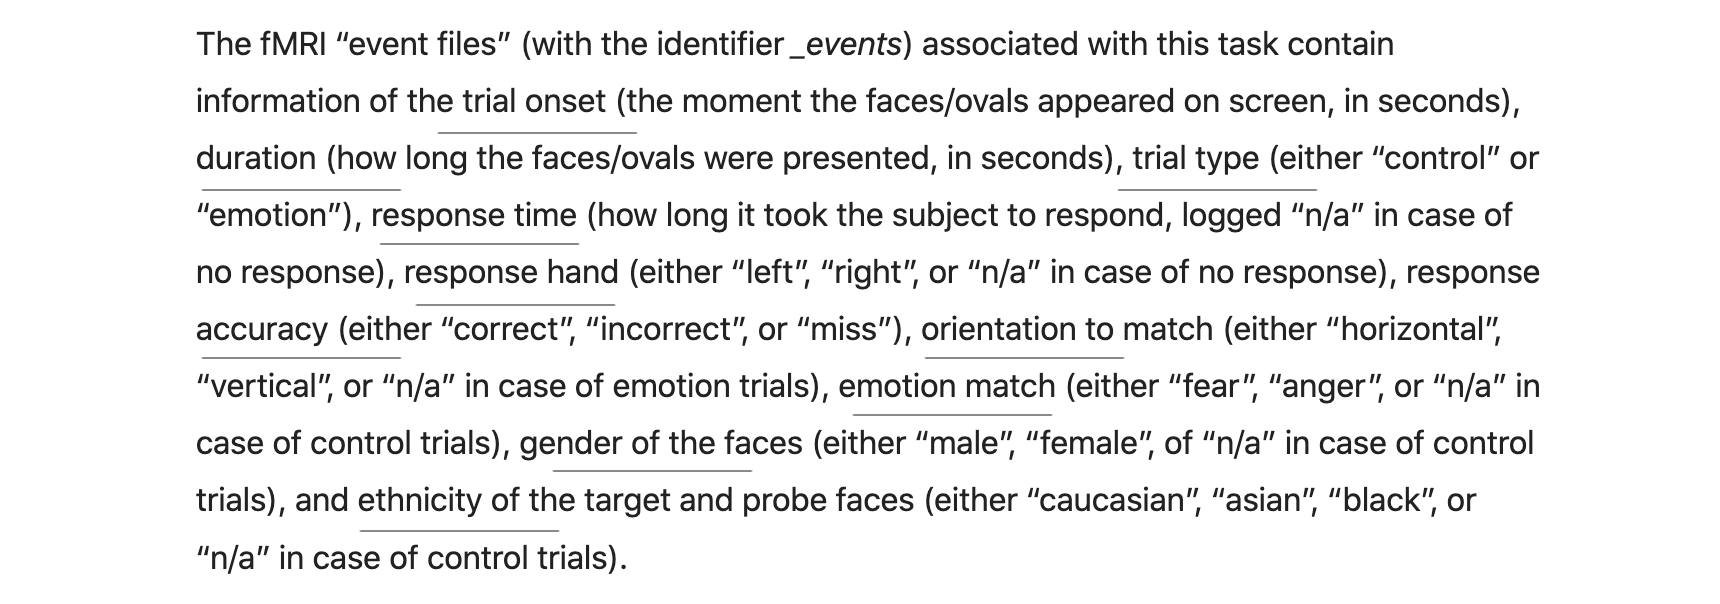



It is unclear where these variables came from, but because the AOMIC paper was peer reviewed for a highly selective journal (Nature), it makes sense to follow it over the documentation in OpenNeuro. We therefore remove the ethn_distractor and ethn_match columns. 

In [6]:
df = df.drop(['ethn_distractor', 'ethn_match'],axis = 1)
df.columns

Index(['index', 'onset', 'duration', 'trial_type', 'response_time',
       'response_hand', 'response_accuracy', 'ori_match', 'sex_of_face',
       'ethn_target', 'emo_match', 'subject', 'participant_id', 'age',
       'sex_of_subject', 'BMI', 'handedness', 'education_category',
       'religious_now', 'raven_score', 'NEO_N', 'NEO_E', 'NEO_O', 'NEO_A',
       'NEO_C'],
      dtype='object')

Now that we have restricted the dataset to only those variables we expect to be in it, let us also make sure that the values in each column are the ones we would expect from the documentation and paper (which are consistent in this respect). To do this we iterate through the dataframe and check if each entry takes one of the values that the documentation says it will. For example we would want every value in the 'sex' column to be either 'male' or 'female'. If an entry is unanticipated then the loop stops and the column and row at which the unanticipated value exists is printed. If all entries are valid then the message "All valid values" will be printed.

In [7]:
# For each row checks that the data in each column takes the anticipated possible values.
# If not the index at with the unanticipated data is printed and the loop stops.
for index, row in df.iterrows():
    # onset should either be NaN or a float
    if (not (pd.isna(row['onset']) or isinstance(row['onset'], float))):
        print('onset')
        print(i)
        break
    # duration should either be NaN or a float
    if (not (pd.isna(row['duration']) or isinstance(row['duration'], float))):
        print('duration')
        print(i)
        break
    # trial_type should either be NaN, control, or emotion
    if (not (pd.isna(row['trial_type']) or (row['trial_type'] == 'control') or (row['trial_type'] == 'emotion'))):
        print('trial_type')
        print(i)
        break
    # response_time should either be NaN or a float
    if (not (pd.isna(row['response_time']) or isinstance(row['response_time'], float))):
        print('response_time')
        print(i)
        break
    # response_hand should either be NaN, control, or emotion
    if (not (pd.isna(row['response_hand']) or (row['response_hand'] == 'right') or (row['response_hand'] == 'left'))):
        print('response_hand')
        print(index)
        break
    # response_accuracy should either be NaN, correct, miss, or incorrect
    if (not (pd.isna(row['response_accuracy']) or (row['response_accuracy'] == 'correct') or (row['response_accuracy'] == 'miss') or (row['response_accuracy'] == 'incorrect'))):
        print('response_accuracy')
        print(index)
        break
    # ori_match should either be NaN, vertical, or horizontal 
    if (not (pd.isna(row['ori_match']) or (row['ori_match'] == 'vertical') or (row['ori_match'] == 'horizontal'))):
        print('ori_match')
        print(index) 
        break
    # sex should either be NaN, male, or female
    if (not (pd.isna(row['sex_of_face']) or (row['sex_of_face'] == 'male') or (row['sex_of_face'] == 'female'))):
        print('sex_of_face')
        break
    # ethn_target should either be NaN, caucasian, black, or asian
    if (not (pd.isna(row['ethn_target']) or (row['ethn_target'] == 'caucasian') or (row['ethn_target'] == 'black') or (row['ethn_target'] == 'asian'))):
        print('ethn_target')
        print(index)
        brea
    # emo_match should either be NaN, fear, or anger
    if (not (pd.isna(row['emo_match']) or (row['emo_match'] == 'fear') or (row['emo_match'] == 'anger'))):
        print('emo_match')
        print(index)
        break
print("All valid values")
    
    

All valid values


We see that all the entries take valid values.

#### Handling Missing Values

Now that we know all our data is valid, we must consider how we deal with the missing values, the NaNs, in the dataframe. Before handling missing data we must ask ourselves "why is the data missing?" Different answers to this question will give us different ways to handle the missing data. 

In [8]:
df.head()

,index,onset,duration,trial_type,response_time,response_hand,response_accuracy,ori_match,sex_of_face,ethn_target,...,BMI,handedness,education_category,religious_now,raven_score,NEO_N,NEO_E,NEO_O,NEO_A,NEO_C
0,0,10.0115,1.9212,control,1.9212,right,correct,vertical,NaN,NaN,...,24.0,right,applied,no,29.0,35,44,37,39,48
1,1,15.0197,1.3478,control,1.3478,left,correct,vertical,NaN,NaN,...,24.0,right,applied,no,29.0,35,44,37,39,48
2,2,20.0279,1.2605,control,1.2605,right,correct,horizontal,NaN,NaN,...,24.0,right,applied,no,29.0,35,44,37,39,48
3,3,25.0362,0.9700,control,0.9700,left,correct,horizontal,NaN,NaN,...,24.0,right,applied,no,29.0,35,44,37,39,48
4,4,30.0444,0.8287,control,0.8287,right,correct,horizontal,NaN,NaN,...,24.0,right,applied,no,29.0,35,44,37,39,48


We can see from just the first few rows of the table that the columns called sex_of_face and ethn_target are both have missing concurrently. After thinking about why this might be, we can realize that this is not by chance. Those variables are only relevant when the trial showed a face to match. In control trials, that show a shape, there would not be a sex, ethnicity, or emotion of what was displayed. When we read in the data files, the function read_csv interpreted such cases as missing data by coding them as NaN. We know this is not exactly accurate. The data is not missing; it is that there is no sex, ethnicity, or emotional expression of a shape in the control trials. Instead of being missing, they are not applicable.

We could account for this by recoding such cases as taking value None. None is a value that is often used to represent the fact that a variable is not applicable. None is, however, harder to work with. NaN is better integrated into the plotting libraries, so if we can avoid recoding variables as None that is desirable. We can keep the not applicable values as NaN if we can show that all cases of NaN in our dataframe are like this. This would mean that there is no truly missing data, only variables that are not applicable to certain trials. We will see that this is the case.

We expect not applicable NaNs exactly in the following cases:
1)  sex_of_face, ethn_target, and emo_match are not applicable if trial_type = 'control' because shapes in the control trial do not have a sex, ethnicity, or emotion.
2) ori_match is not applicable if trial_type = 'emotion' because the faces in the emotion trial are not displayed at different angles.
3) response_time and response_hand are not applicable if response_accuracy = 'miss' because if a response was missed the subject did not respond on time and there was no hand with which they responded.

If there are NaN values that are not explained by these cases, they are missing values, no just not applicable. Therefore we will check and perform the following for each row:
1) if sex_of_face, ethn_target, or emo_match are NaN when trial_type == 'emotion' then print 'truly missing'
2) if ori_match is NaN when trial_type == 'control' then print 'truly missing'
3) if response_time or response_hand are NaN when response_accuracy is not 'miss' then print 'truly missing'

In [9]:
# Checks to see if any data is truly missing. 
# Prints "Truly missing" if such data exists.
# If all NaN values are a result of variables being
# not applicable then "All NaNs are not 
# applicable" is printed.

truly_missing_exists = False

for index, row in df.iterrows():
    if ((pd.isnull(df.at[index, 'sex_of_face']) | pd.isnull(df.at[index, 'ethn_target']) | 
        pd.isnull(df.at[index, 'emo_match'])) & (df.at[index, 'trial_type'] == 'emotion')):
        print("Truly missing") 
        truly_missing_exists = True
    if (pd.isnull(df.at[index, 'ori_match']) & (df.at[index, 'trial_type'] == 'control')):
        print("Truly missing")
        truly_missing_exists = True
    if ((pd.isnull(df.at[index, 'response_time']) | pd.isnull(df.at[index, 'response_hand'])) 
        & (df.at[index, 'response_accuracy'] != 'miss')):
        print("Truly missing")
        truly_missing_exists = True

if (not truly_missing_exists):
    print("All NaNs are not applicable") 

All NaNs are not applicable


We see that all the NaNs in our dataframe are a result of not applicable variables. No data is truly missing. Thus we do not need to perform any techniques like imputation on any of the NaNs. We simply leave them in the table because they represent when a data value was not applicable to the given trial entry. 

#### Handling Missing Data
If we were to have had missing data we would need to figure out what type of missing data it was. There are three types of missing data.
- Missing Completely at Random (MCAR): When our data is missing because a random process, like random bits were corrupted in our local copy of a tsv file, we say the data is MCAR. In this case you just have a smaller sample size of the same distribution of data so can proceed with your analysis while ignoring the missing entries.
- Missing at Random (MAR): When our missing data is statistically depenendent on some of our other variables we call it MAR. The difference from MCAR is that we can predict reasonably well what the data would have been based on the other variables. In this case you will want to use an imputation method.
- Missing not at Random (MNAR): When our data is missing for a systematic reason that biases the sample, like large entries were not storable on a computer, we call this MNAR. In this case your data sample is biased in a way you cannot easily fix. You might have to redo the sample. 

This is only a brief introduction to handling missing data. For a detailed guide and explanation see the NIH recommendations here: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3668100/

### Exploratory Data Analysis:

Now that our data has been prepared for analysis we can start examining it. It often happens in data science that relationships among your variables might motivate new questions and hypotheses to test. That is the purpose of exploratory data analysis, to see what patterns our brain can pick up on by visualizing the data. Therefore, before directly addressing our main question, we will get familiar with our dataset by plot different relationships between variables and seeing what we can discover! Of course we should not blindly plot relationships. The relationships we look for will be motivated by particular questions.

#### Motivating Question 1 

_Is there a difference in the response time of subjects to the control vs. emotion trials?_ 

We plot a histogram of the response times to get a sense of the distribution of times for each trial type.

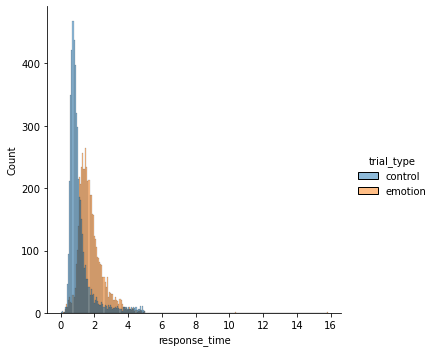

In [10]:
import seaborn as sns

# Creates histogram
sns.displot(df, x="response_time", hue = 'trial_type', bins = 250)

Why did the auto-plot function extend the x-axis out to 16? If we look very carefully there is a response time near 16 seconds. Lets take a closer look at the max response time to see its value.

In [11]:
df['response_time'].max()

15.839899999999972

The max response time is 15.8399 seconds. This does not make sense because according to the AOMIC paper published in nature the maximum duration for a trial is 5 seconds. The response time should be less than or equal to the length of a trial (duration) since, as described below, a subject must respond within 4.8 seconds for their response to not be considered a miss.
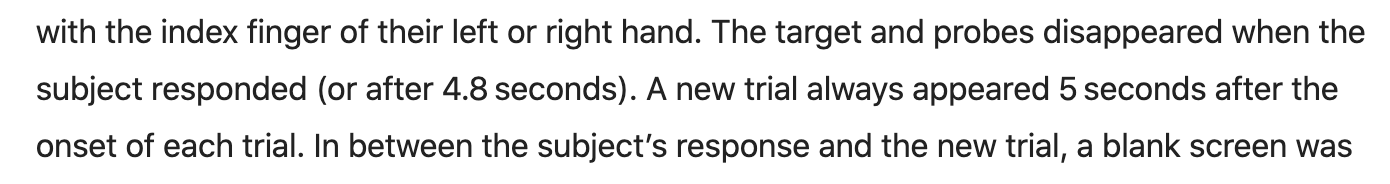


We found invalid data! But didn't we get rid of all the invalid data earlier? 

This experience teaches us an important lesson. Data science is partially an art. There is not a strict methodolgy we can always follow to always get correct answers. Sometimes we can miss invalid data because we make the choices about how to process and analyze data. The important thing is to fix mistakes when you find them. 

It also teaches us why the data science pipeline is not necessarily seequential. Sometimes we must go back to a previous step. Now that we found invalid data we go back briefly to the data management stage and get rid of the data points with a duration longer than 5 seconds. 

Ideally we could know why this invalid data is present and perhaps account for it accordingly. We do not have access to this information. Fortunately, there are very few invalid values like this so removing them will not effect our results significantly. 

In [12]:
# Stores newly cleaned data
df_clean = df[(df['duration'] <= 5)]

We now return to our exploratory analysis and plot the distribution of response times for each trial type again. Notice how the range of response time values is now within the desired range.

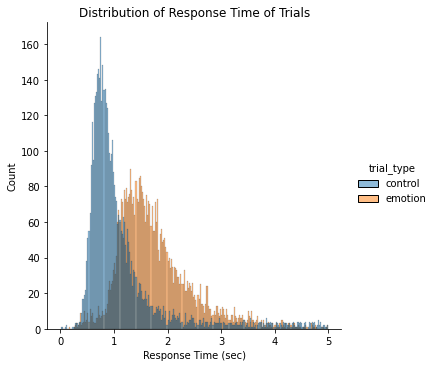

In [13]:
p = sns.displot(df_clean, x="response_time", hue = 'trial_type', bins = 250)
p.set(xlabel='Response Time (sec)', ylabel='Count', title = 'Distribution of Response Time of Trials')



Immediately we can see two things. First, it appears that people take longer, on average, to respond when they need to match a facial expression compared to when they need to match a shape. Second, it appears that there is greater variance in the response times of matching emotional facial expressions because the distribution is fatter around its center. We will calculuate the mean and standard deviation of each response time to check these intuitions.

In [14]:
# Prints control response time mean
print("Control Mean: {}".format(df_clean[(df_clean['trial_type'] == 'control')]['response_time'].mean()))
# Prints emotion trial response time mean
print("Emotion Mean: {}".format(df_clean[(df_clean['trial_type'] == 'emotion')]['response_time'].mean()))
# Prints control response time standard deviation
print("Control Standard Deviation: {}".format(df_clean[(df_clean['trial_type'] == 'control')]['response_time'].std()))
# Prints emotion trial response time standard deviation
print("Emotion Standard Deviation: {}".format(df_clean[(df_clean['trial_type'] == 'emotion')]['response_time'].std()))    

Control Mean: 1.1477172623883063
Emotion Mean: 1.7673773759292761
Control Standard Deviation: 0.7922243827764892
Emotion Standard Deviation: 0.7105823073995964


Our intuition about the mean was correct. Mean response time for the emotion trials is larger than that of the control trials. However, our intuition about the standard deviations was wrong! We see that the standard deviation is actually greater for the control trial even though the distribution looks thinner. This might be accounted for by the fact that the control response time distribution is very right skewed so the values in the tail increase the standard deviation significantly. This gives us another important takeaway: always verify your intuitions with statistical calculations. Intuitions can be wrong. 

Given that people tend to respond slower to the emotion matching task, we would also expect that people will miss the emotion matching task more often than they do the control task. We will create a bar chart to compare the aggregate response accuracies for the different trial types. 

#### Motivating Question 2:
_Do people miss the emotion matching trials more?_

[Text(0.5, 0, 'Response Accuracy'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Response Accuracy Frequencies')]

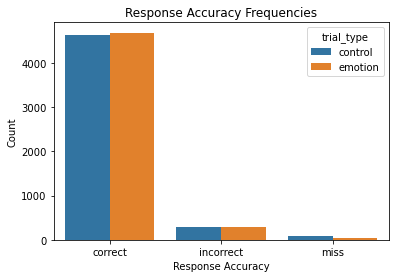

In [15]:
# Creates bar plot to count frequency of all response types
p = sns.countplot(x='response_accuracy', hue ="trial_type", data=df_clean)
p.set(xlabel='Response Accuracy', ylabel='Count', title = 'Response Accuracy Frequencies')

Again we see something surprising! The response accuracy for both the control and emotion trials are quite similar. However, people appear to miss the control trials more often, against the expectation! We can zoom in to see this more clearly.

[Text(0.5, 0, 'Response Accuracy'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Response Accuracy Frequencies')]

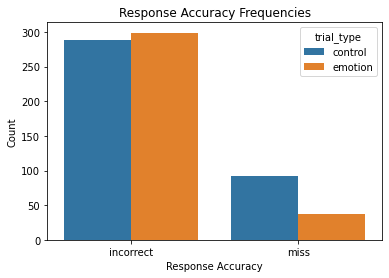

In [16]:
# Creates bar plot for incorrect and missed responses only
p = sns.countplot(x='response_accuracy', hue ="trial_type", 
                  data=df_clean[(df_clean['response_accuracy'] == "miss") | (df_clean['response_accuracy'] == "incorrect")])
p.set(xlabel='Response Accuracy', ylabel='Count', title = 'Response Accuracy Frequencies')

Maybe it was that there we simply less emotion trials overall so less emotion trials that could have been missed. Let's see how many trials of each type we have.

In [17]:
print(len(df_clean[df_clean['trial_type'] == 'control']))
print(len(df_clean[df_clean['trial_type'] == 'emotion']))

5016
5014


We see there is not a significant difference. Another possibility is that the result could simply be due to random chance. In a sample of over 10,000 trials, a 50 count difference might not be terribly significant. The statistical test needed to check this claim given the multiple levels of our variables is beyond the scope of basic data science.

But perhaps another explanation of why people take longer to respond to emotion trials but are less likely to miss them is that faces evoke a brief stress response that makes people more conscientious so they take longer, on average, to respond, but are more alert to respond on time. We can explore this hypothesis by looking at how the personality trait conscentiousness predicts response time and misses. 

Recall that conscientiousness is "one’s level of self-control in planning and organization." <sup> (2) </sup>
We might then expect that those who are high on conscientiousness would have less missing responses and take longer to respond on average. Note how we naturally came back to our central question through exploratory data analysis. The exploratory data analysis helped us form a hypothesis about a potential psychological factor (conscientousness) that might predict emotional comprehension. 

First we will briefly continue exploring the data by plotting the relationship between each personality factor and the response time for each trial type. We will also plot IQ and response time. We do this because it does not take much more work to process the other psychometric factors if we are already processing conscientiousness. Afterwards we will test our conscientiousness hypothesis.

In [18]:
# Groups data by subject
df_subj = df_clean.groupby(['subject', 'trial_type'])

# Computes mean of numeric variables for each subject's data
average_response_time = df_subj.mean()['response_time']
control_avg_resp_time = average_response_time.loc[:, 'control']
emotion_avg_resp_time = average_response_time.loc[:, 'emotion']

# Average of a given subject's personality IQ score on either 
# trial type andwill be their personality and IQ score since 
# the same value is repeated for each trial and trial type
C_scores = df_subj.mean()['NEO_C'].loc[:, 'emotion']
A_scores = df_subj.mean()['NEO_A'].loc[:, 'emotion']
E_scores = df_subj.mean()['NEO_E'].loc[:, 'emotion']
O_scores = df_subj.mean()['NEO_O'].loc[:, 'emotion']
N_scores = df_subj.mean()['NEO_N'].loc[:, 'emotion']
Raven_scores = df_subj.mean()['raven_score'].loc[:, 'emotion']

[Text(0.5, 0, 'Conscientiousness Score'),
 Text(0, 0.5, 'Average Response Time'),
 Text(0.5, 1.0, 'Control Response Time vs. Conscientiousness')]

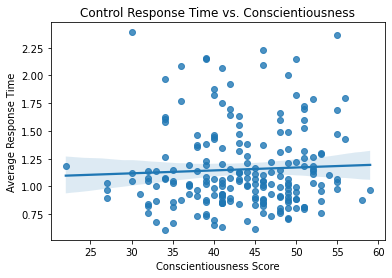

In [19]:
# Plots average response time of control trials against conscientiousness score with linear regression
p = sns.regplot(x = C_scores, y = control_avg_resp_time) 
p.set(xlabel='Conscientiousness Score', ylabel='Average Response Time', title = 'Control Response Time vs. Conscientiousness')

[Text(0.5, 0, 'Conscientiousness Score'),
 Text(0, 0.5, 'Average Response Time'),
 Text(0.5, 1.0, 'Emotion Response Time vs. Conscientiousness')]

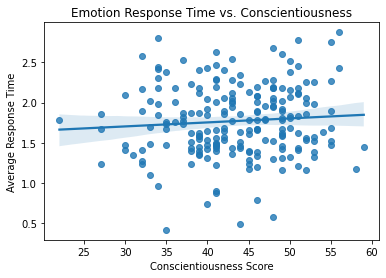

In [20]:
# Plots average response time of emotion trials against conscientiousness score with linear regression
p = sns.regplot(x = C_scores, y = emotion_avg_resp_time) 
p.set(xlabel='Conscientiousness Score', ylabel='Average Response Time', title = 'Emotion Response Time vs. Conscientiousness')

[Text(0.5, 0, 'Agreableness Score'),
 Text(0, 0.5, 'Average Response Time'),
 Text(0.5, 1.0, 'Control Response Time vs. Agreableness')]

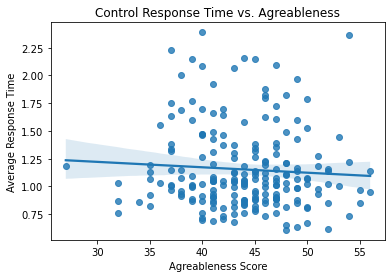

In [21]:
# Plots average response time of control trials against agreableness score with linear regression
p = sns.regplot(x = A_scores, y = control_avg_resp_time) 
p.set(xlabel='Agreableness Score', ylabel='Average Response Time', title = 'Control Response Time vs. Agreableness')

[Text(0.5, 0, 'Agreableness Score'),
 Text(0, 0.5, 'Average Response Time'),
 Text(0.5, 1.0, 'Emotion Response Time vs. Agreableness')]

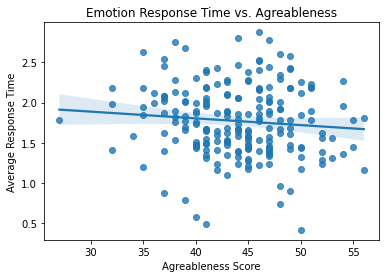

In [22]:
# Plots average response time of emotion trials against agreableness score with linear regression
p = sns.regplot(x = A_scores, y = emotion_avg_resp_time) 
p.set(xlabel='Agreableness Score', ylabel='Average Response Time', title = 'Emotion Response Time vs. Agreableness')

[Text(0.5, 0, 'Extraversion Score'),
 Text(0, 0.5, 'Average Response Time'),
 Text(0.5, 1.0, 'Control Response Time vs. Extraversion')]

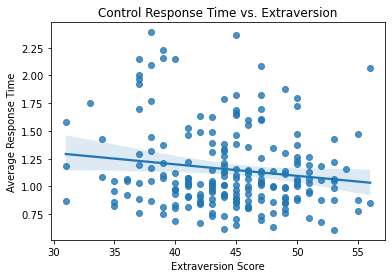

In [23]:
# Plots average response time of control trials against extraversion score with linear regression
p = sns.regplot(x = E_scores, y = control_avg_resp_time) 
p.set(xlabel='Extraversion Score', ylabel='Average Response Time', title = 'Control Response Time vs. Extraversion')

[Text(0.5, 0, 'Extraversion Score'),
 Text(0, 0.5, 'Average Response Time'),
 Text(0.5, 1.0, 'Emotion Response Time vs. Extraversion')]

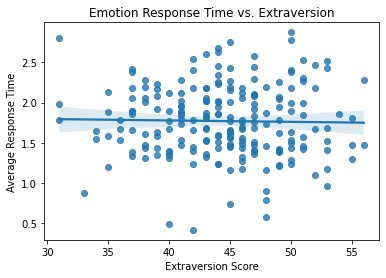

In [24]:
# Plots average response time of emotion trials against extraversion score with linear regression
p = sns.regplot(x = E_scores, y = emotion_avg_resp_time) 
p.set(xlabel='Extraversion Score', ylabel='Average Response Time', title = 'Emotion Response Time vs. Extraversion')

[Text(0.5, 0, 'Openness Score'),
 Text(0, 0.5, 'Average Response Time'),
 Text(0.5, 1.0, 'Control Response Time vs. Openness')]

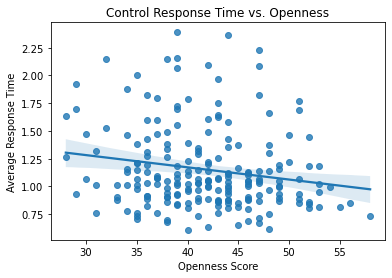

In [25]:
# Plots average response time of control trials against openness score with linear regression
p = sns.regplot(x = O_scores, y = control_avg_resp_time) 
p.set(xlabel='Openness Score', ylabel='Average Response Time', title = 'Control Response Time vs. Openness')

[Text(0.5, 0, 'Openness Score'),
 Text(0, 0.5, 'Average Response Time'),
 Text(0.5, 1.0, 'Emotion Response Time vs. Openness')]

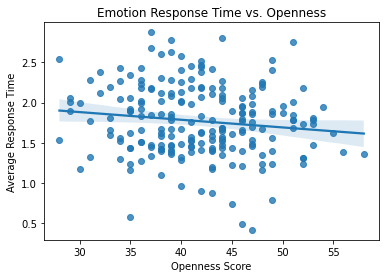

In [26]:
# Plots average response time of emotion trials against openness score with linear regression
p = sns.regplot(x = O_scores, y = emotion_avg_resp_time) 
p.set(xlabel='Openness Score', ylabel='Average Response Time', title = 'Emotion Response Time vs. Openness')

[Text(0.5, 0, 'Neuroticism Score'),
 Text(0, 0.5, 'Average Response Time'),
 Text(0.5, 1.0, 'Response Time vs. Neuroticism')]

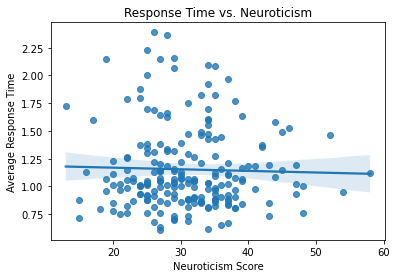

In [27]:
# Plots average response time of control trials against neuroticism score with linear regression
p = sns.regplot(x = N_scores, y = control_avg_resp_time) 
p.set(xlabel='Neuroticism Score', ylabel='Average Response Time', title = 'Response Time vs. Neuroticism')

[Text(0.5, 0, 'Neuroticism Score'),
 Text(0, 0.5, 'Average Response Time'),
 Text(0.5, 1.0, 'Emotion Response Time vs. Neuroticism')]

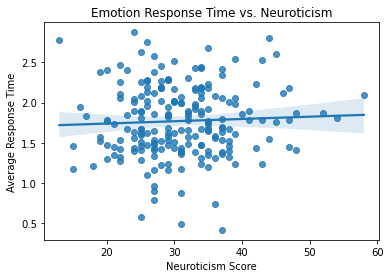

In [28]:
# Plots average response time of emotion trials against neuroticism score with linear regression
p = sns.regplot(x = N_scores, y = emotion_avg_resp_time) 
p.set(xlabel='Neuroticism Score', ylabel='Average Response Time', title = 'Emotion Response Time vs. Neuroticism')

[Text(0.5, 0, 'Raven Score'),
 Text(0, 0.5, 'Average Response Time'),
 Text(0.5, 1.0, 'Control Response Time vs. Raven Score')]

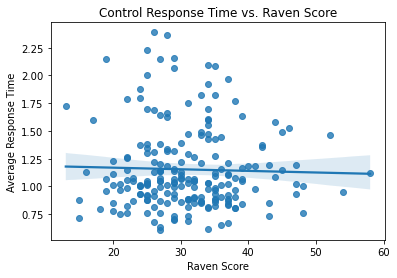

In [29]:
# Plots average response time of control trials against neuroticism score with linear regression
p = sns.regplot(x = N_scores, y = control_avg_resp_time) 
p.set(xlabel='Raven Score', ylabel='Average Response Time', title = 'Control Response Time vs. Raven Score')

[Text(0.5, 0, 'Raven Score'),
 Text(0, 0.5, 'Average Response Time'),
 Text(0.5, 1.0, 'Emotion Response Time vs. Raven Score')]

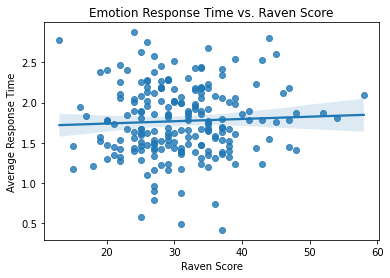

In [30]:
# Plots average response time of emotion trials against neuroticism score with linear regression
p = sns.regplot(x = N_scores, y = emotion_avg_resp_time) 
p.set(xlabel='Raven Score', ylabel='Average Response Time', title = 'Emotion Response Time vs. Raven Score')

All of the 12 plots are suggest there is no relationship between personality factors/IQ score and average response time on either the emotion or control trials. As we discovered before, inuitions based on graphs can be wrong. We will therefore still statistically test our hypothesis that higher conscientiousness causes slower response times. We will actually test the weaker hypothesis that conscientiousness linearly predicts response times. If there is a significant relationship then we can tell the direction of this relationship by looking at the regression coefficient. 

### Hypothesis Testing

Hypothesis testing is where we evaluate whether a claim we make is supported by statistical evidence. We want to see if our claim that conscientiousness linearly predicts reponse time is supported by our data. There is a 6 step procedure we generally follow to do hypothesis tests.

#### 1. Identify the population and appropriate test
Our population is the participants who did the emotion matching task. To test the significance of a regression coefficient we want to run a T-test on our linear coefficient. See https://vitalflux.com/linear-regression-hypothesis-testing-examples/ for more infromation about testing linear regressions with T-test and F-tests. 

#### 2. State null and alternative hypothesis
The null hypothesis is the baseline claim of no effect. The alternative hypothesis is the negation of the null hypothesis. For our test,

_The null hypothesis (H<sub>0</sub>):_ The coefficient of our linear regression is 0. 

_The alternative hypothesis (H<sub>0</sub>):_ The coefficient of our linear regression is not 0.

#### 3. Determine characteristics of the comparison distribution
Python's sklearn library will take care of this for us. 

#### 4. Determine Critical Values
The test maps our data to a _test statistic_. Given this statistic we can then figure out how likely we were to have gotten that test statistic under the null hypothesis. We call that probability the _p-value_. The smaller the p-value, the less likely that the null hypothesis is true. In psychology the generally accepted threshold for what is considered a low enough p-value is 0.05. If the p-value is less than 0.05 then there is a less than 5% chance that we would get the test statistic that we did if the null hypothesis is true. When we reject the null hypothesis for p-values less than 0.05 we are saying we are ok with incorrectly rejecting a null hypothesis 5% of the time. We will follow this convention and set our critical p-value to be 0.05.

#### 5. Calculate Test Statistic
Python's sklearn library will take care of this for us. In our case we are looking for the t-statistic of our linear regression coefficient for both of our conscientiousness plots. The following code gets the regression model, t-value, and p-value of the coefficient for both plots.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

# Attempts to gets linear regression equation for conscientiousness 
# score vs. avg response time on control trials. (will error)
reg = LinearRegression()
reg.fit(C_scores.values.reshape(-1,1), control_avg_resp_time.values.reshape(-1,1))
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

X = sm.add_constant(pd.Series(C_scores).values.reshape(-1,1))
est = sm.OLS(control_avg_resp_time.values.reshape(-1,1), X)
est2 = est.fit()
print(est2.summary())

/opt/conda/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

We see an error resulted. It says we cannot use the fit function when they are missing values. Why are there missing values?

In [32]:
# Finds subject number who has a missing value for 
# average response times for control trials
for i in control_avg_resp_time.index:
    if pd.isnull(control_avg_resp_time.loc[i]):
        print(i)

90


Let's examine the data of subject 90.

In [33]:
# Examines data of subject 90
df_clean[df_clean['subject'] == 90]

,index,onset,duration,trial_type,response_time,response_hand,response_accuracy,ori_match,sex_of_face,ethn_target,...,BMI,handedness,education_category,religious_now,raven_score,NEO_N,NEO_E,NEO_O,NEO_A,NEO_C
4080,0,10.0125,4.9000,control,NaN,NaN,miss,horizontal,NaN,NaN,...,19.0,right,applied,no,20.0,26,48,33,51,41
4081,1,15.0206,4.9000,control,NaN,NaN,miss,horizontal,NaN,NaN,...,19.0,right,applied,no,20.0,26,48,33,51,41
4082,2,20.0288,4.9000,control,NaN,NaN,miss,horizontal,NaN,NaN,...,19.0,right,applied,no,20.0,26,48,33,51,41
4083,3,25.0370,4.9000,control,NaN,NaN,miss,vertical,NaN,NaN,...,19.0,right,applied,no,20.0,26,48,33,51,41
4084,4,30.0452,4.9000,control,NaN,NaN,miss,vertical,NaN,NaN,...,19.0,right,applied,no,20.0,26,48,33,51,41
4085,5,35.0533,4.9000,control,NaN,NaN,miss,vertical,NaN,NaN,...,19.0,right,applied,no,20.0,26,48,33,51,41
4086,6,40.0615,1.5679,emotion,1.5679,left,correct,NaN,female,caucasian,...,19.0,right,applied,no,20.0,26,48,33,51,41
4087,7,45.0697,3.1994,emotion,3.1994,left,incorrect,NaN,male,black,...,19.0,right,applied,no,20.0,26,48,33,51,41
4088,8,50.0779,2.0551,emotion,2.0551,right,correct,NaN,female,caucasian,...,19.0,right,applied,no,20.0,26,48,33,51,41
4089,9,55.0860,2.3418,emotion,2.3418,left,correct,NaN,male,black,...,19.0,right,applied,no,20.0,26,48,33,51,41


We can see that subject 90 missed all the control trials. Given how infrequently people missed control trials, it is likely that something else caused subject 90's control data to appear as all missing. The missing value in the average time comes from the fact that when a respondant misses a trial there is not response time. If they miss all the control trials then there is no average response time either. Subject 90 is clearly an outlier we can remove since it is extrememly unlikely that they just happened to miss all the control trials. Note that this also helps to explain the earlier discrepency of why there were more misses on the control trial. The difference was artifically widened by subject 90's wonky data.

We will drop subject 90's data when plotting the control trial average response times since, although it is likely missing not at random, it is only one data point and will not effect whether there is a relationship between conscientiousness score and average response time.

In [34]:
# Gets linear regression equation for conscientiousness score vs. avg response time 
# on control trials without subject 90
reg = LinearRegression()
reg.fit(C_scores.drop(index= 90).values.reshape(-1,1), control_avg_resp_time.drop(index= 90).values.reshape(-1,1))
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

# Prints regression summary including t-statistic and p-value
X = sm.add_constant(pd.Series(C_scores.drop(index= 90)).values.reshape(-1,1))
est = sm.OLS(control_avg_resp_time.drop(index= 90).values.reshape(-1,1), X)
est2 = est.fit()
print(est2.summary())

The linear model is: Y = 1.0398 + 0.0026191X
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5012
Date:                Sun, 15 May 2022   Prob (F-statistic):              0.480
Time:                        14:54:00   Log-Likelihood:                -86.573
No. Observations:                 208   AIC:                             177.1
Df Residuals:                     206   BIC:                             183.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

In [35]:
# Gets linear regression equation for conscientiousness score vs. avg response time 
# on emotion trials
reg = LinearRegression()
reg.fit(C_scores.values.reshape(-1,1), emotion_avg_resp_time.values.reshape(-1,1))
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

# Prints regression summary including t-statistic and p-value
X = sm.add_constant(pd.Series(C_scores).values.reshape(-1,1))
est = sm.OLS(emotion_avg_resp_time.values.reshape(-1,1), X)
est2 = est.fit()
print(est2.summary())

The linear model is: Y = 1.5554 + 0.0049699X
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.259
Date:                Sun, 15 May 2022   Prob (F-statistic):              0.263
Time:                        14:54:00   Log-Likelihood:                -124.67
No. Observations:                 209   AIC:                             253.3
Df Residuals:                     207   BIC:                             260.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

#### 6. Interpret Results

Let's look at each table seperately.

Control Trials (first table): We see that our t-statistic is 0.708 which corresponded to a p-value of 0.48. That means there is almost a 50% chance that we would observe the value we did under the null hypothesis. This is a likelihood well above than the 0.05 probability threshold we decided upon. Because it is likely we would get out t-statistic given our null hypothesis we can't reject the null hypothesis. Therefore we say we fail to reject the null hypothesis. This means it is very unlikely there is a linear relationship between conscientiousness score and average response time on the control trials. The summary table also tells us more. We see that the R-squared value is low, 0.002. The R-squared value tells us how much of the variance of the response times is explained by conscientiousness. We see that effectively nothing is explained by conscientiousness. 

Emotions Trials (second table): Similar to the control trials the p-value is very large. For our test statistic of 1.122 we have a p-value of 0.263. That means there is almost a one in four chance we would have gotten that test statistic if the null hypothesis is true. This means we can't rule out the null hypothesis as a plausible possibility so we fail to reject the null hypothesis. Again the R-squared is negligbly low, at 0.006. Together these statistics tell us that cosncientiousness does not linearly predict response time to emotion trials.

#### Second Hypothesis Test
We have run a test to evaluate our hypothesis that higher conscientiousness will predict slower response times on the emotion matching task and found that this is not the case. Now we can do the same process to evaluate our hypothesis that higher conscientiousness will predict less misses. Lets first plot the relationship to get an intuition.

In [36]:
# Defines the function to compute the missed response rate
# for a given subject
def get_miss_rate(x):
    misses = 0
    for val in x:
        if val == 'miss':
            misses = misses + 1
    return misses/len(x)

# Groups data by subject and trial type and calculates the missed response rate
response_rate = df_clean.groupby(['subject', 'trial_type']).aggregate(get_miss_rate)
emotion_miss_rate = response_rate['response_accuracy'].loc[:, 'emotion']

[Text(0.5, 0, 'Conscientiousness Score'),
 Text(0, 0.5, 'Correct Response Rate'),
 Text(0.5, 1.0, 'Correct Response Rate vs. Conscientiousness')]

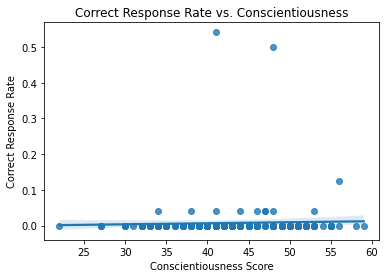

In [37]:
p = sns.regplot(x = C_scores, y = emotion_miss_rate) 
p.set(xlabel='Conscientiousness Score', ylabel='Correct Response Rate', title = 'Correct Response Rate vs. Conscientiousness')


From this plot we can see that the miss resonse rate is fairly constant accross conscientiousness scores so there does not seems to be much of a relationship. It does look like there are more outliers around a score of 35-50 though. This is not surprising when we consider the distribution of conscientiousness scores:

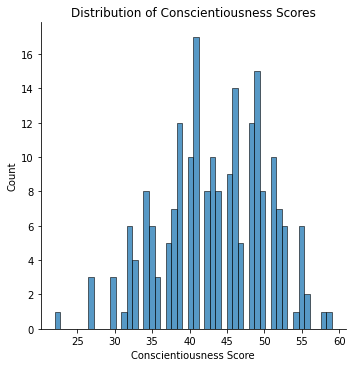

In [38]:
p = sns.displot(x=C_scores, bins = 50)
p.set(xlabel='Conscientiousness Score', ylabel='Count', title = 'Distribution of Conscientiousness Scores')

We can see that it is simply the fact that most of the conscientiousness score are between 35 to 50 so it makes sense we would observe more response outliers in that range.

Again we get rigorously test whether our linear regression significantly predicts miss rate on emotion trials using a t-test. Our null hypothesis is that there is no linear relationship (the coefficient is 0). Our cutoff is again a p-value of 0.05. We use sklearn to compute the p-value of our coefficient's test statistic.

In [39]:
# Gets linear regression equation for conscientiousness score vs. miss rate
reg = LinearRegression()
reg.fit(C_scores.values.reshape(-1,1), emotion_miss_rate.values.reshape(-1,1))
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

# Prints regression summary including t-statistic and p-value
X = sm.add_constant(pd.Series(C_scores).values.reshape(-1,1))
est = sm.OLS(emotion_miss_rate.values.reshape(-1,1), X)
est2 = est.fit()
print(est2.summary())

The linear model is: Y = -0.0051742 + 0.00028914X
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.3057
Date:                Sun, 15 May 2022   Prob (F-statistic):              0.581
Time:                        14:54:03   Log-Likelihood:                 321.85
No. Observations:                 209   AIC:                            -639.7
Df Residuals:                     207   BIC:                            -633.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

The t-statistic is 0.553 and the p-value is 0.581. There is over a 50% chance that our null hypothesis of no relationship would give us this t-statistic. We certainly cannot reject the null hypothesis meaning we can safely conclude there is no relationship between conscientiousness and one's miss rate.

### Discussion/ Communication of Insights

We have arrived at the final part of the data science pipeline. After collecting our data, processing it, exploring it, and rigorously hypothesis testing it, we must convert the numbers to human interpretable insights. 

Let's first summarize what we have done. Our motivating question was whether any psychometric factors can predict emotional intelligence. We found data that measured emotion recognition through an emotion matching task. Emotion recognition is one dimension of emotional intelligence so we restricted our broad question to the more narrow question of whether any psychometric factors predict emotion recognition/ comprehension. We then processed our data by putting it into one dataframe, making it easy to computationally anlayze. We also considered how to handle invalid and missing values in our data. Then we explored our data and found a counter intuitive pattern. It looked like people responded, on average, slower to the emotion matching trials but missed the emotion matching trials less. This suggested that conscientiousness might play a role in explaining the distribution of emotion recognition data because we would expect people high on conscientiousness to be more cautious in their response but also more careful to not miss a response. This gave us a hypothesis to test. We then plotted all our psychometryic data with response times for both the control trial and the emotion trials to see if we could quickly find any other patterns we might want to look into. The plots all showed no relationship between their psychometric variables and response times, giving us the intuition that our hypothesis might be wrong. Nevertheless, because intuitions can be wrong, we tested our conscientiousness hypotheses using a t-test. The results from the t-tests confirmed our intuition that our hypothesis was wrong. There is no (linear) relationship between conscientiousness score and response time and no (linear) relationship between conscientiousness score and miss rate. 

Given the striking lack of relationship between psychometric variables and response time/accuracy on the emotion matching task we can conclude the following. The ability to recognize emotions is unrelated to the psychometric variables of personality and IQ. Emotion recognition is only one dimension of emotional intelligence, however, so we cannot conclude that emotional intelligence is a completely orthogonal psychometric dimension to personality and IQ. More studies would be needed to assess that claim.

Another important lesson we get from this tutorial is that negative results will happen in data science, and science more broadly. It is important not to fudge data to force an effect. Negative results tell us our hypotheses are wrong and that is important too. 

### Sources

1. https://www.ihhp.com/meaning-of-emotional-intelligence/
2. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5639474/
3. https://iq-tests.org/the-raven-iq-test.html
4. https://www.nature.com/articles/s41597-021-00870-6
5. https://openneuro.org/datasets/ds002785/versions/2.0.0/file-display/task-emomatching_acq-seq_events.json